## <font color='#1EB5D4'> Bank Customer Churn. </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg)

#### This dataset ranks people by churn or not churn, our goal here is to predict which customers will churn.

#### Our database has 10000 values ​​and 18 columns, Here we will use the "Customer-Churn-Records.csv" database that has been made available for use, below you will see an analysis of the data, the processing of this data and the use of the learning classification of machine models to achieve our goal.

#### Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import bz2

## <font color='#1EB5D4'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [55]:
df = pd.read_csv('../data/raw/Customer-Churn-Records.csv', sep = ',')

#### Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.

- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [6]:
df.shape

(10000, 18)

In [7]:
df.describe(exclude=['int64', 'float64'])

,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [9]:
(df.isnull().sum()/len(df))

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

## <font color='#1EB5D4'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.
- Here, looking at the correlation of our variables, we can see that we have 100% correlation between the target variables and the Complain variable, so let's eliminate the Complain variable.

<Axes: >

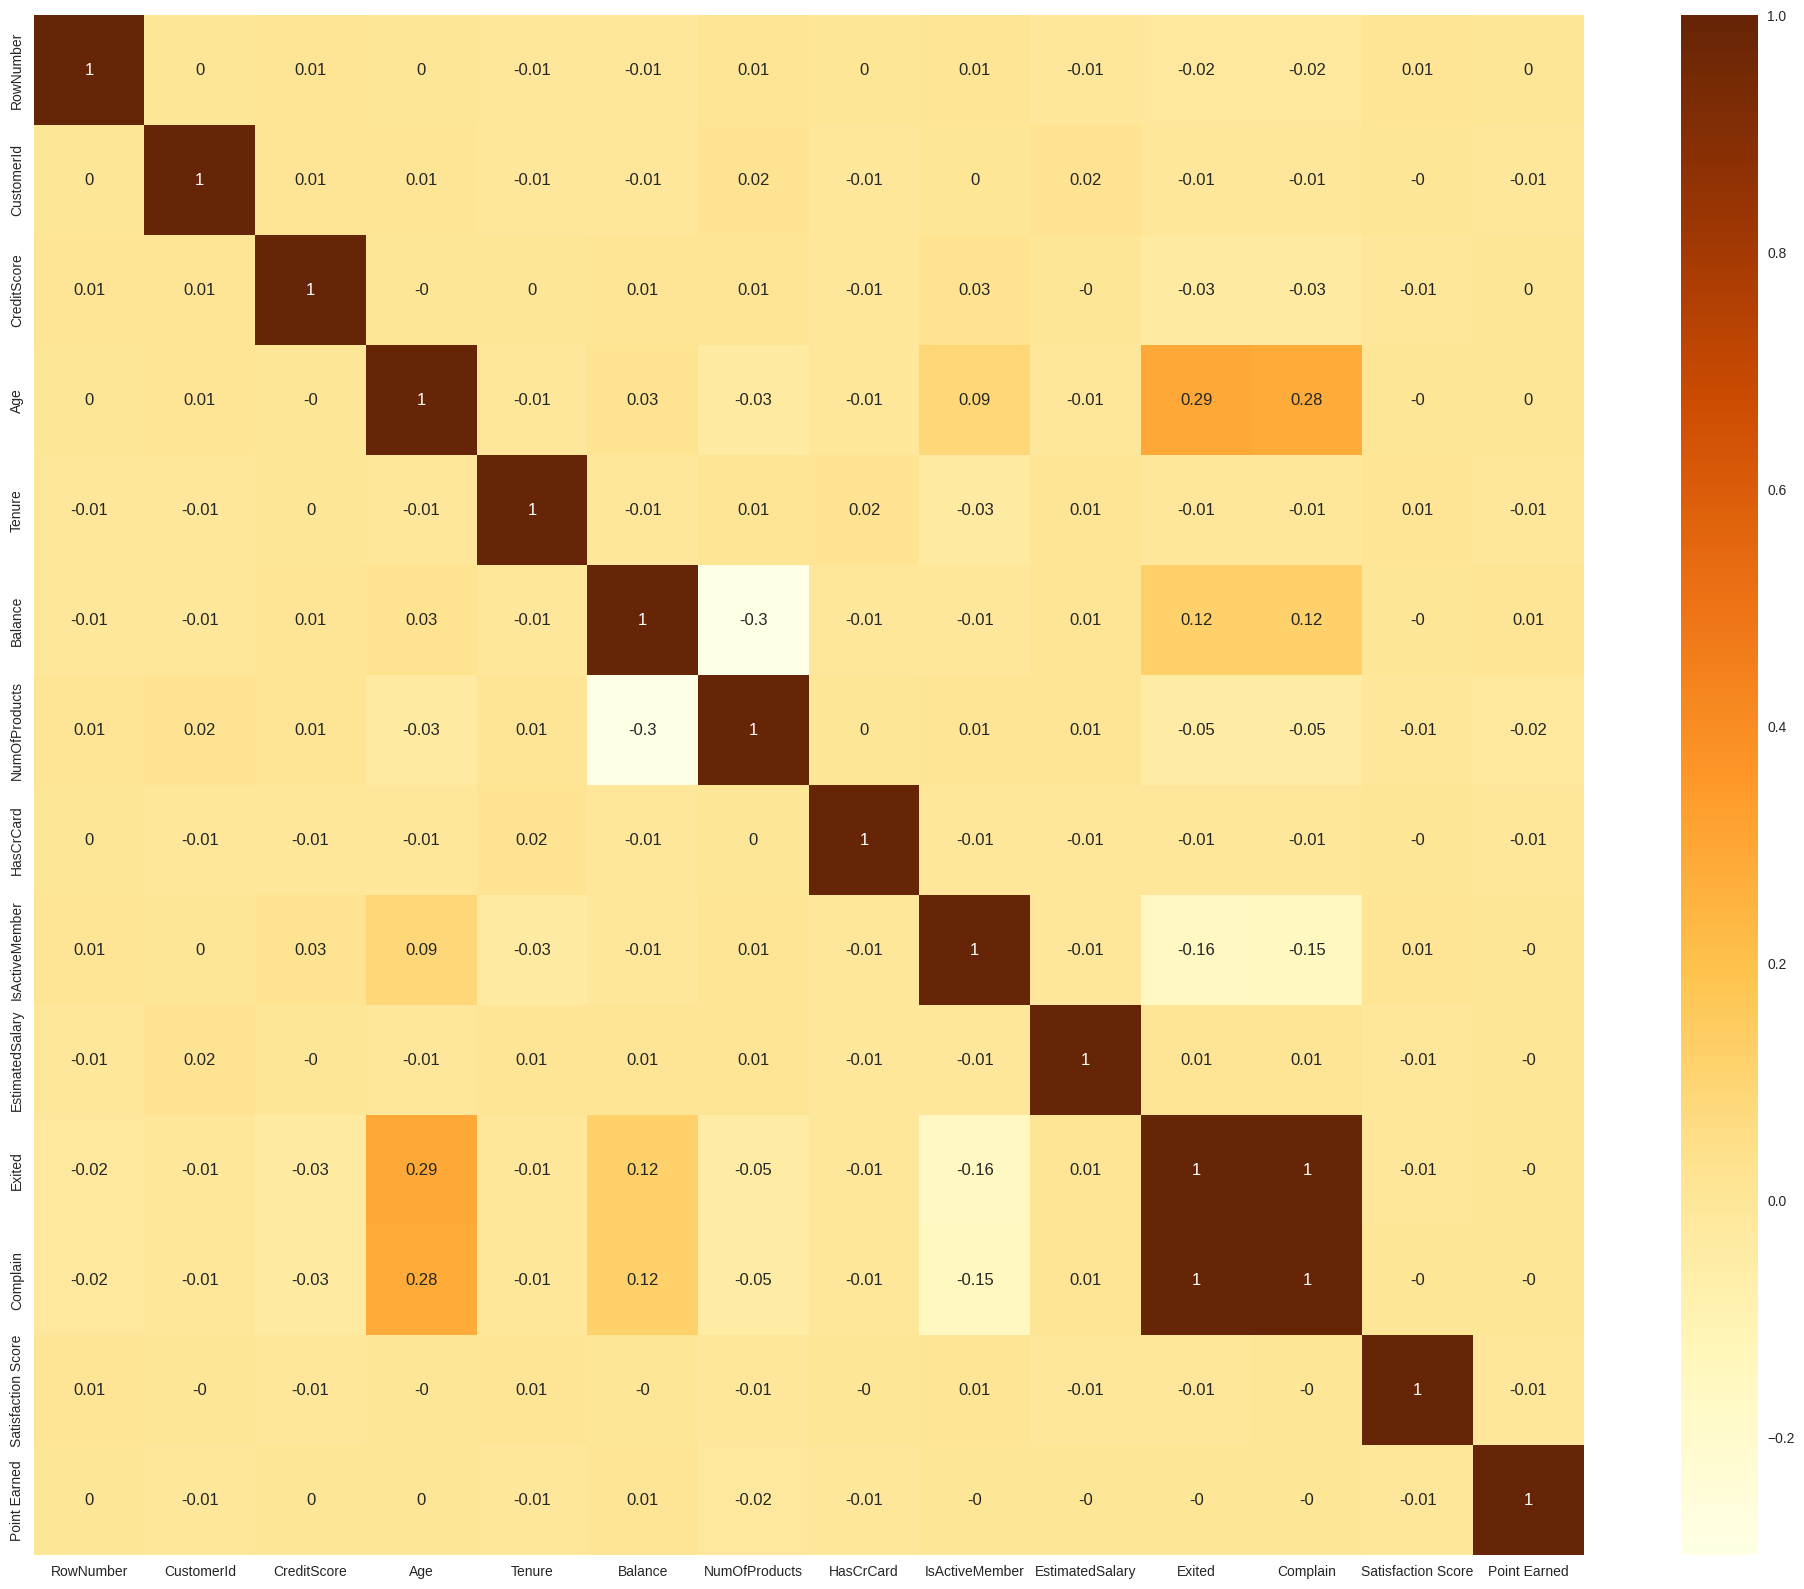

In [11]:
corr = df.corr(numeric_only=True).round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [56]:
df = df.drop('Complain', axis = 1)

#### Categorical Variables.

#### Looking at our categorical variables we can see that most of our variables are well distributed, we can see that our customers are mostly from France, with the gender variable well distributed, and usually with 1 or 2 products, a very important thing is that we see that our target variable is not well distributed, we will probably have to balance the class.

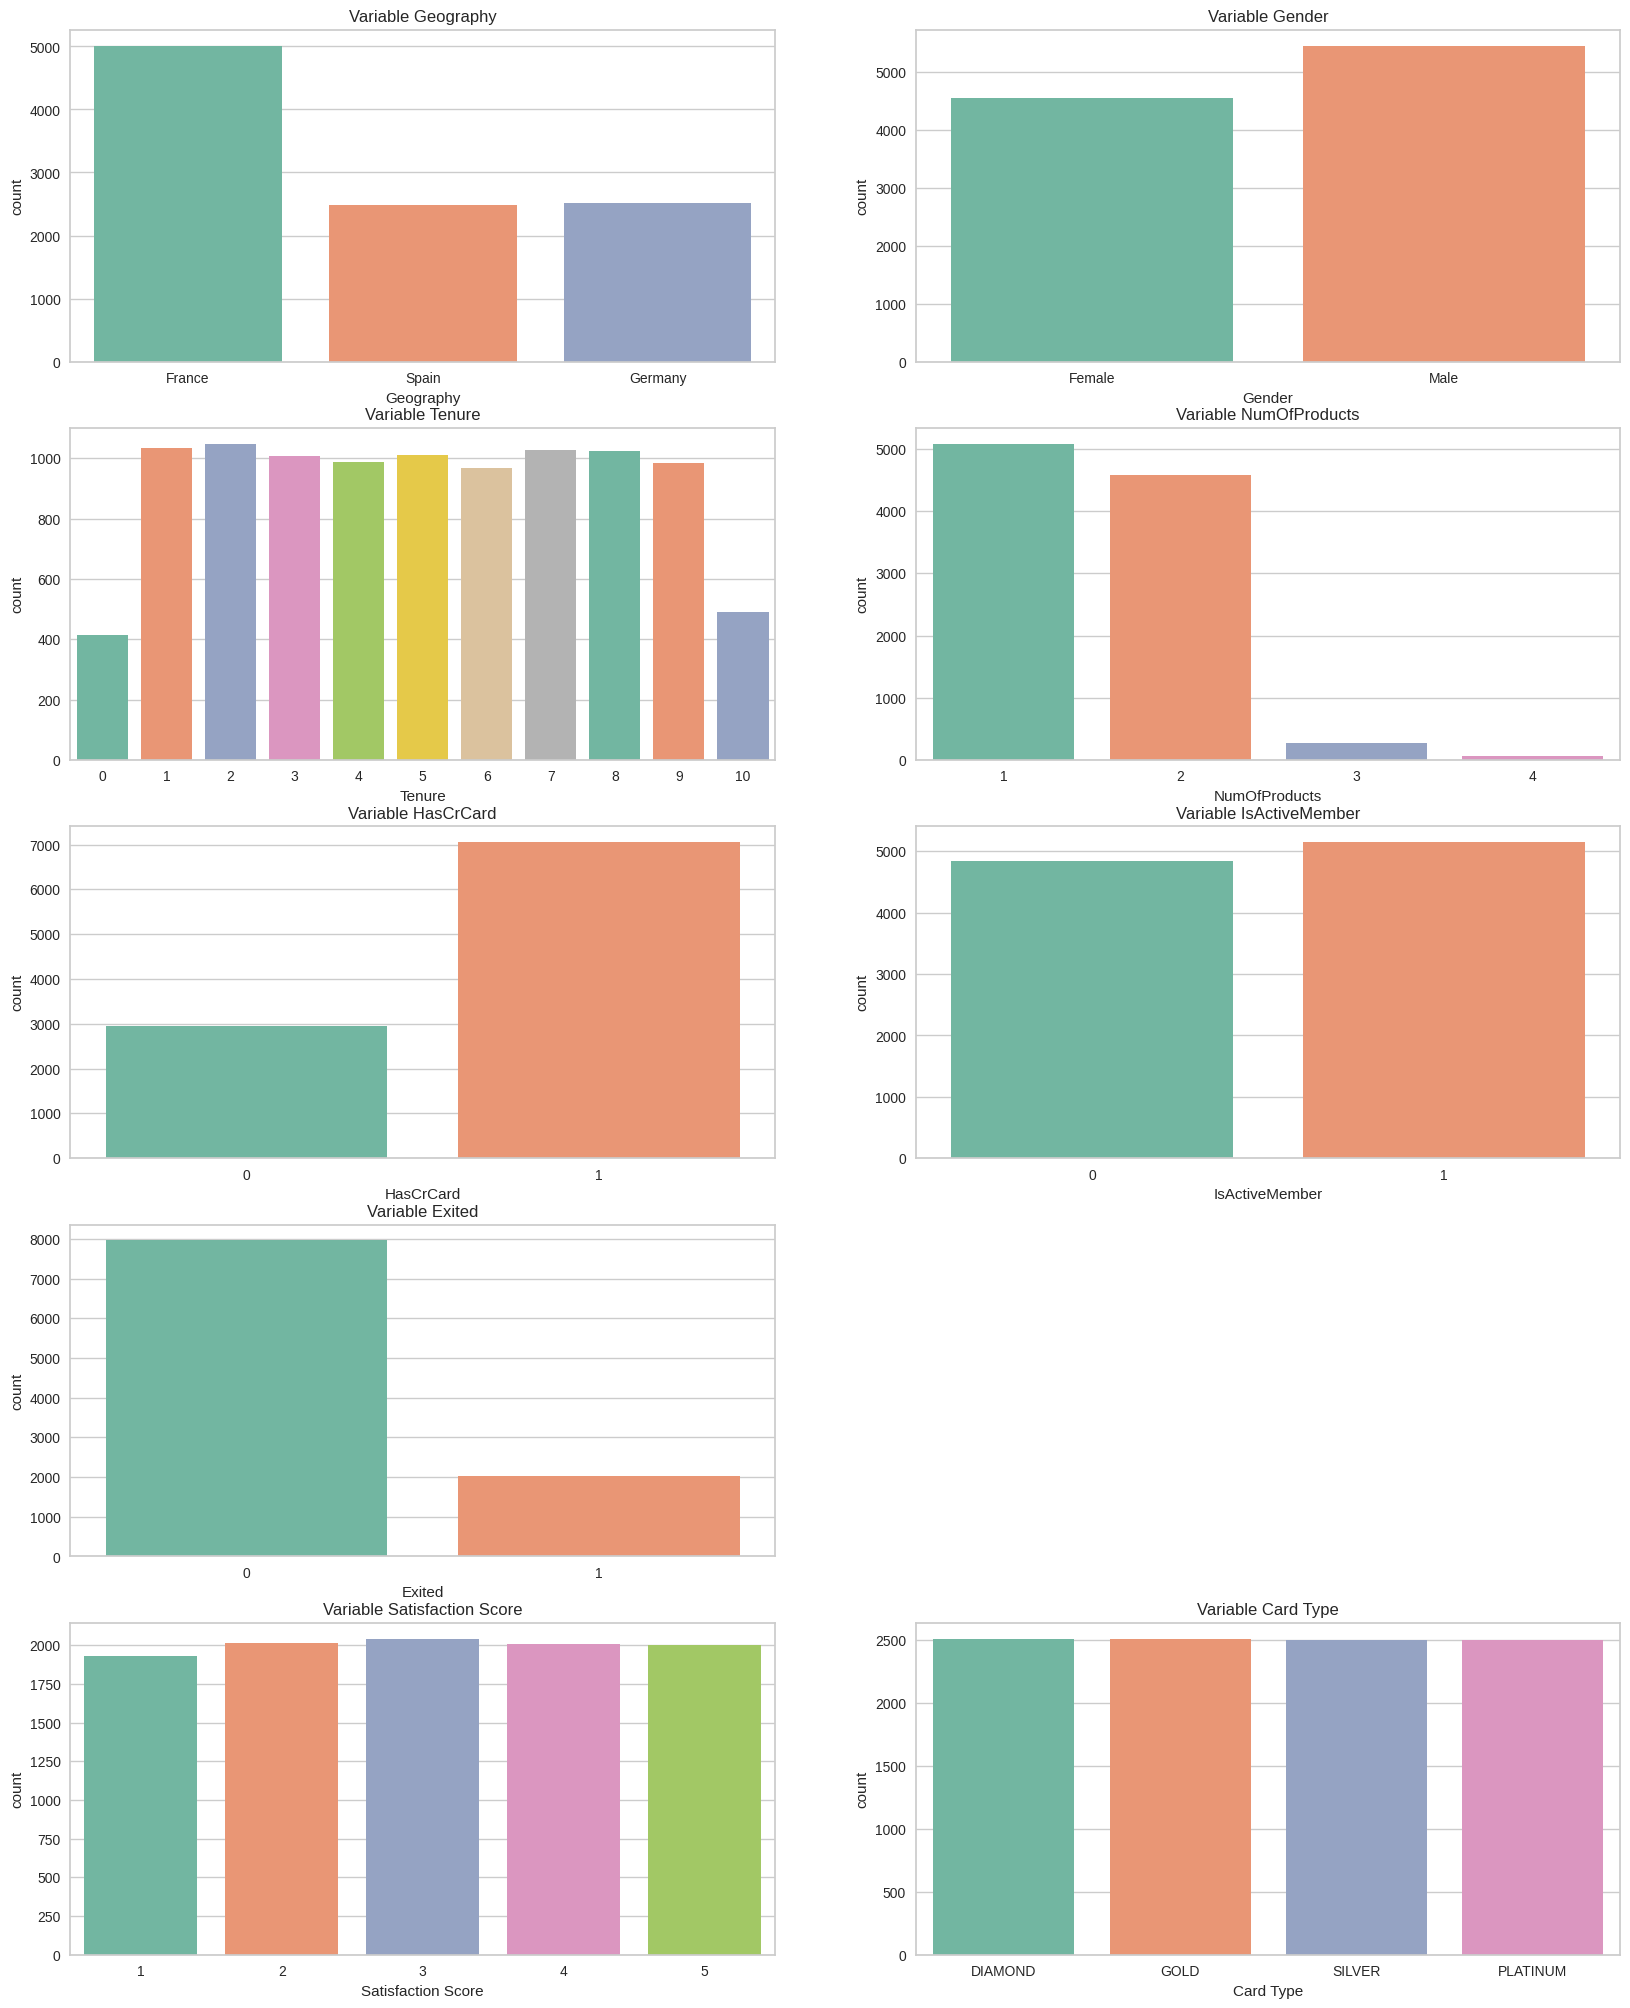

In [13]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df)

# plt.subplot(5, 2, 8)
# plt.gca().set_title('Variable Complain')
# sns.countplot(x = 'Complain', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df)
plt.show()

#### Continuous Variables.

#### Looking at our continuous variables we can see that most of the variables are well balanced, like the estimated salary we can see that we have practically the same number of people for each salary range, the same thing for the PointEarned variable, when we look at the variable CreditScore and Age we can see that they have practically the same behavior, a non-perfect normal distribution, and when we look at the balance variable we can see that most of our data are from people who don't have money in their accounts, and those who have it are fine balanced.

<Axes: xlabel='Point Earned', ylabel='Count'>

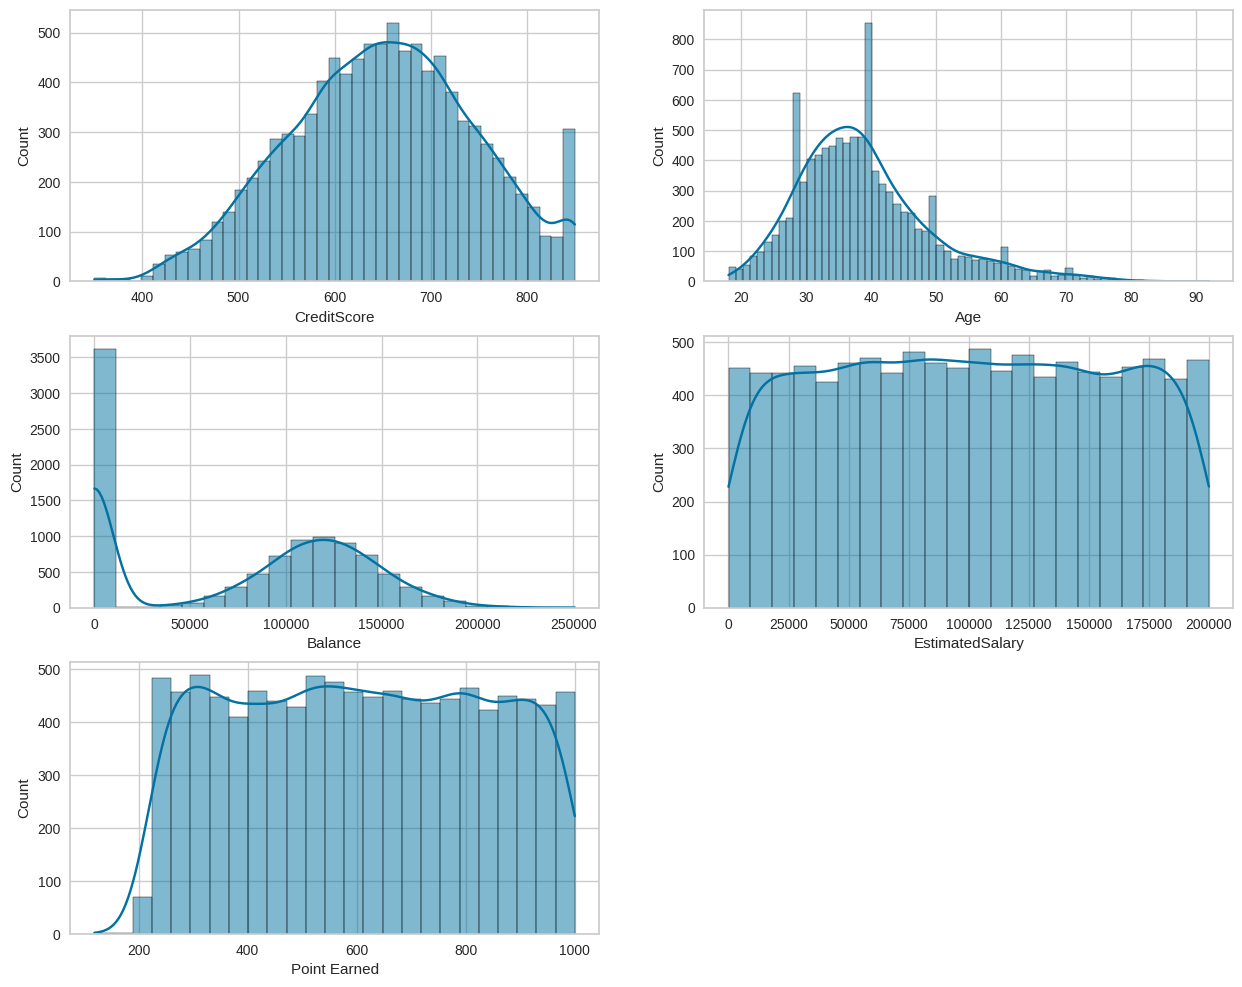

In [14]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df['CreditScore'], kde = True)

plt.subplot(3, 2, 2)
sns.histplot(x = df['Age'], kde = True)

plt.subplot(3, 2, 3)
sns.histplot(x = df['Balance'], kde = True)

plt.subplot(3, 2, 4)
sns.histplot(x = df['EstimatedSalary'], kde = True)

plt.subplot(3, 2, 5)
sns.histplot(x = df['Point Earned'], kde = True)

#### Looking at the boxplots of our continuous variables we can see that we have few outliers, for now we will leave them.

<Axes: title={'center': 'Boxplot CreditScore'}, xlabel='CreditScore'>

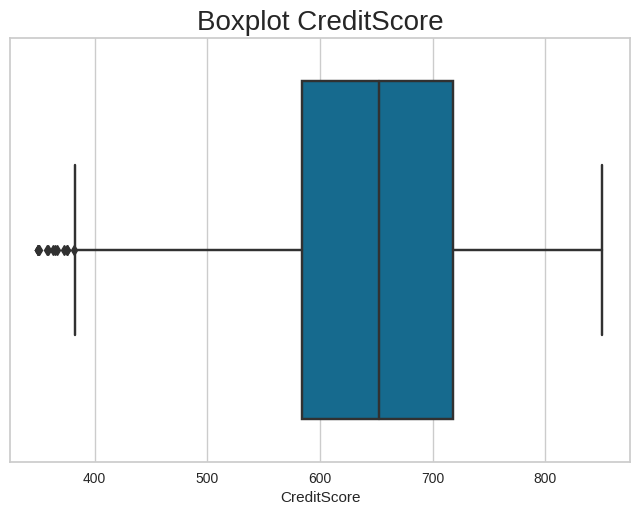

In [15]:
plt.title("Boxplot CreditScore", fontdict = {'fontsize': 20})
sns.boxplot(x=df["CreditScore"])

<Axes: title={'center': 'Boxplot Age'}, xlabel='Age'>

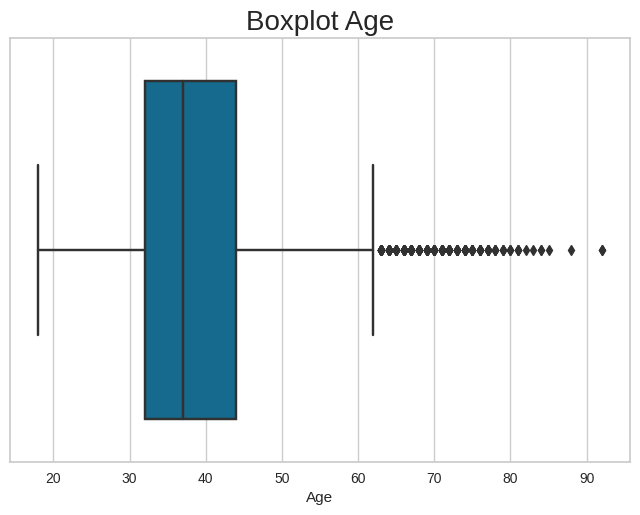

In [16]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<Axes: title={'center': 'Boxplot Balance'}, xlabel='Balance'>

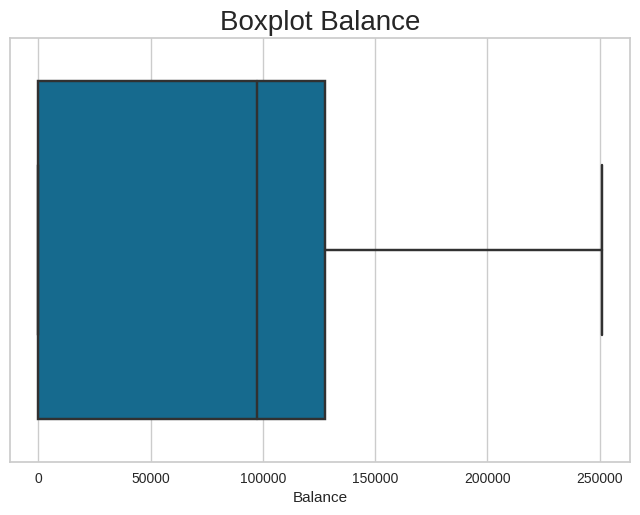

In [17]:
plt.title("Boxplot Balance", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Balance"])

<Axes: title={'center': 'Boxplot EstimatedSalary'}, xlabel='EstimatedSalary'>

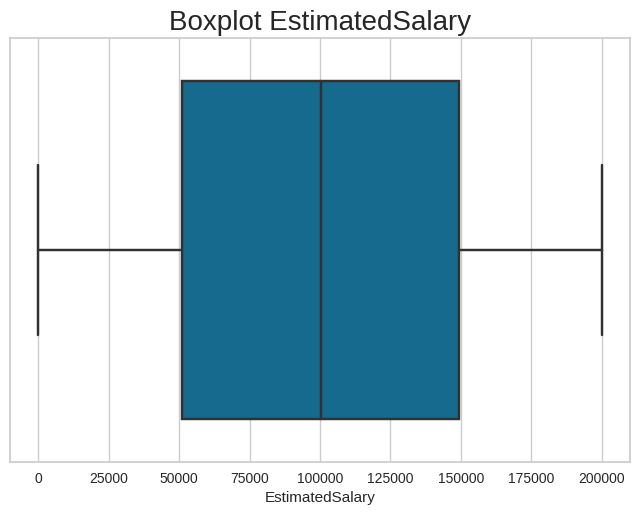

In [18]:
plt.title("Boxplot EstimatedSalary", fontdict = {'fontsize': 20})
sns.boxplot(x=df["EstimatedSalary"])

<Axes: title={'center': 'Boxplot Point Earned'}, xlabel='Point Earned'>

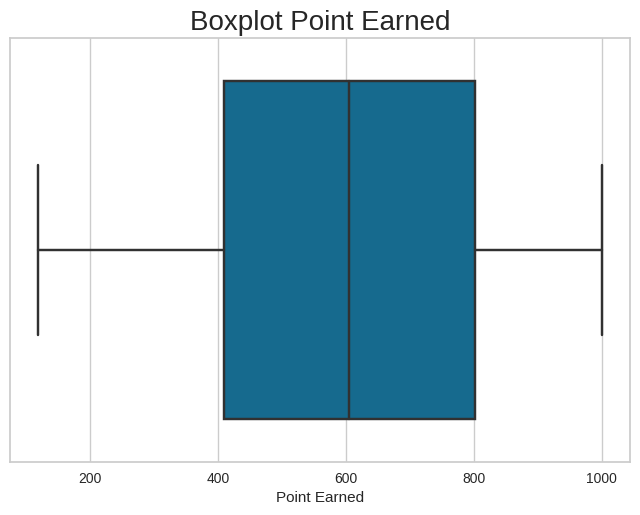

In [19]:
plt.title("Boxplot Point Earned", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Point Earned"])

#### Bivariate Analysis.

#### Comparing our categorical variables with our target variable I cannot see any variable that has a very different behavior between the positive and negative result.

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

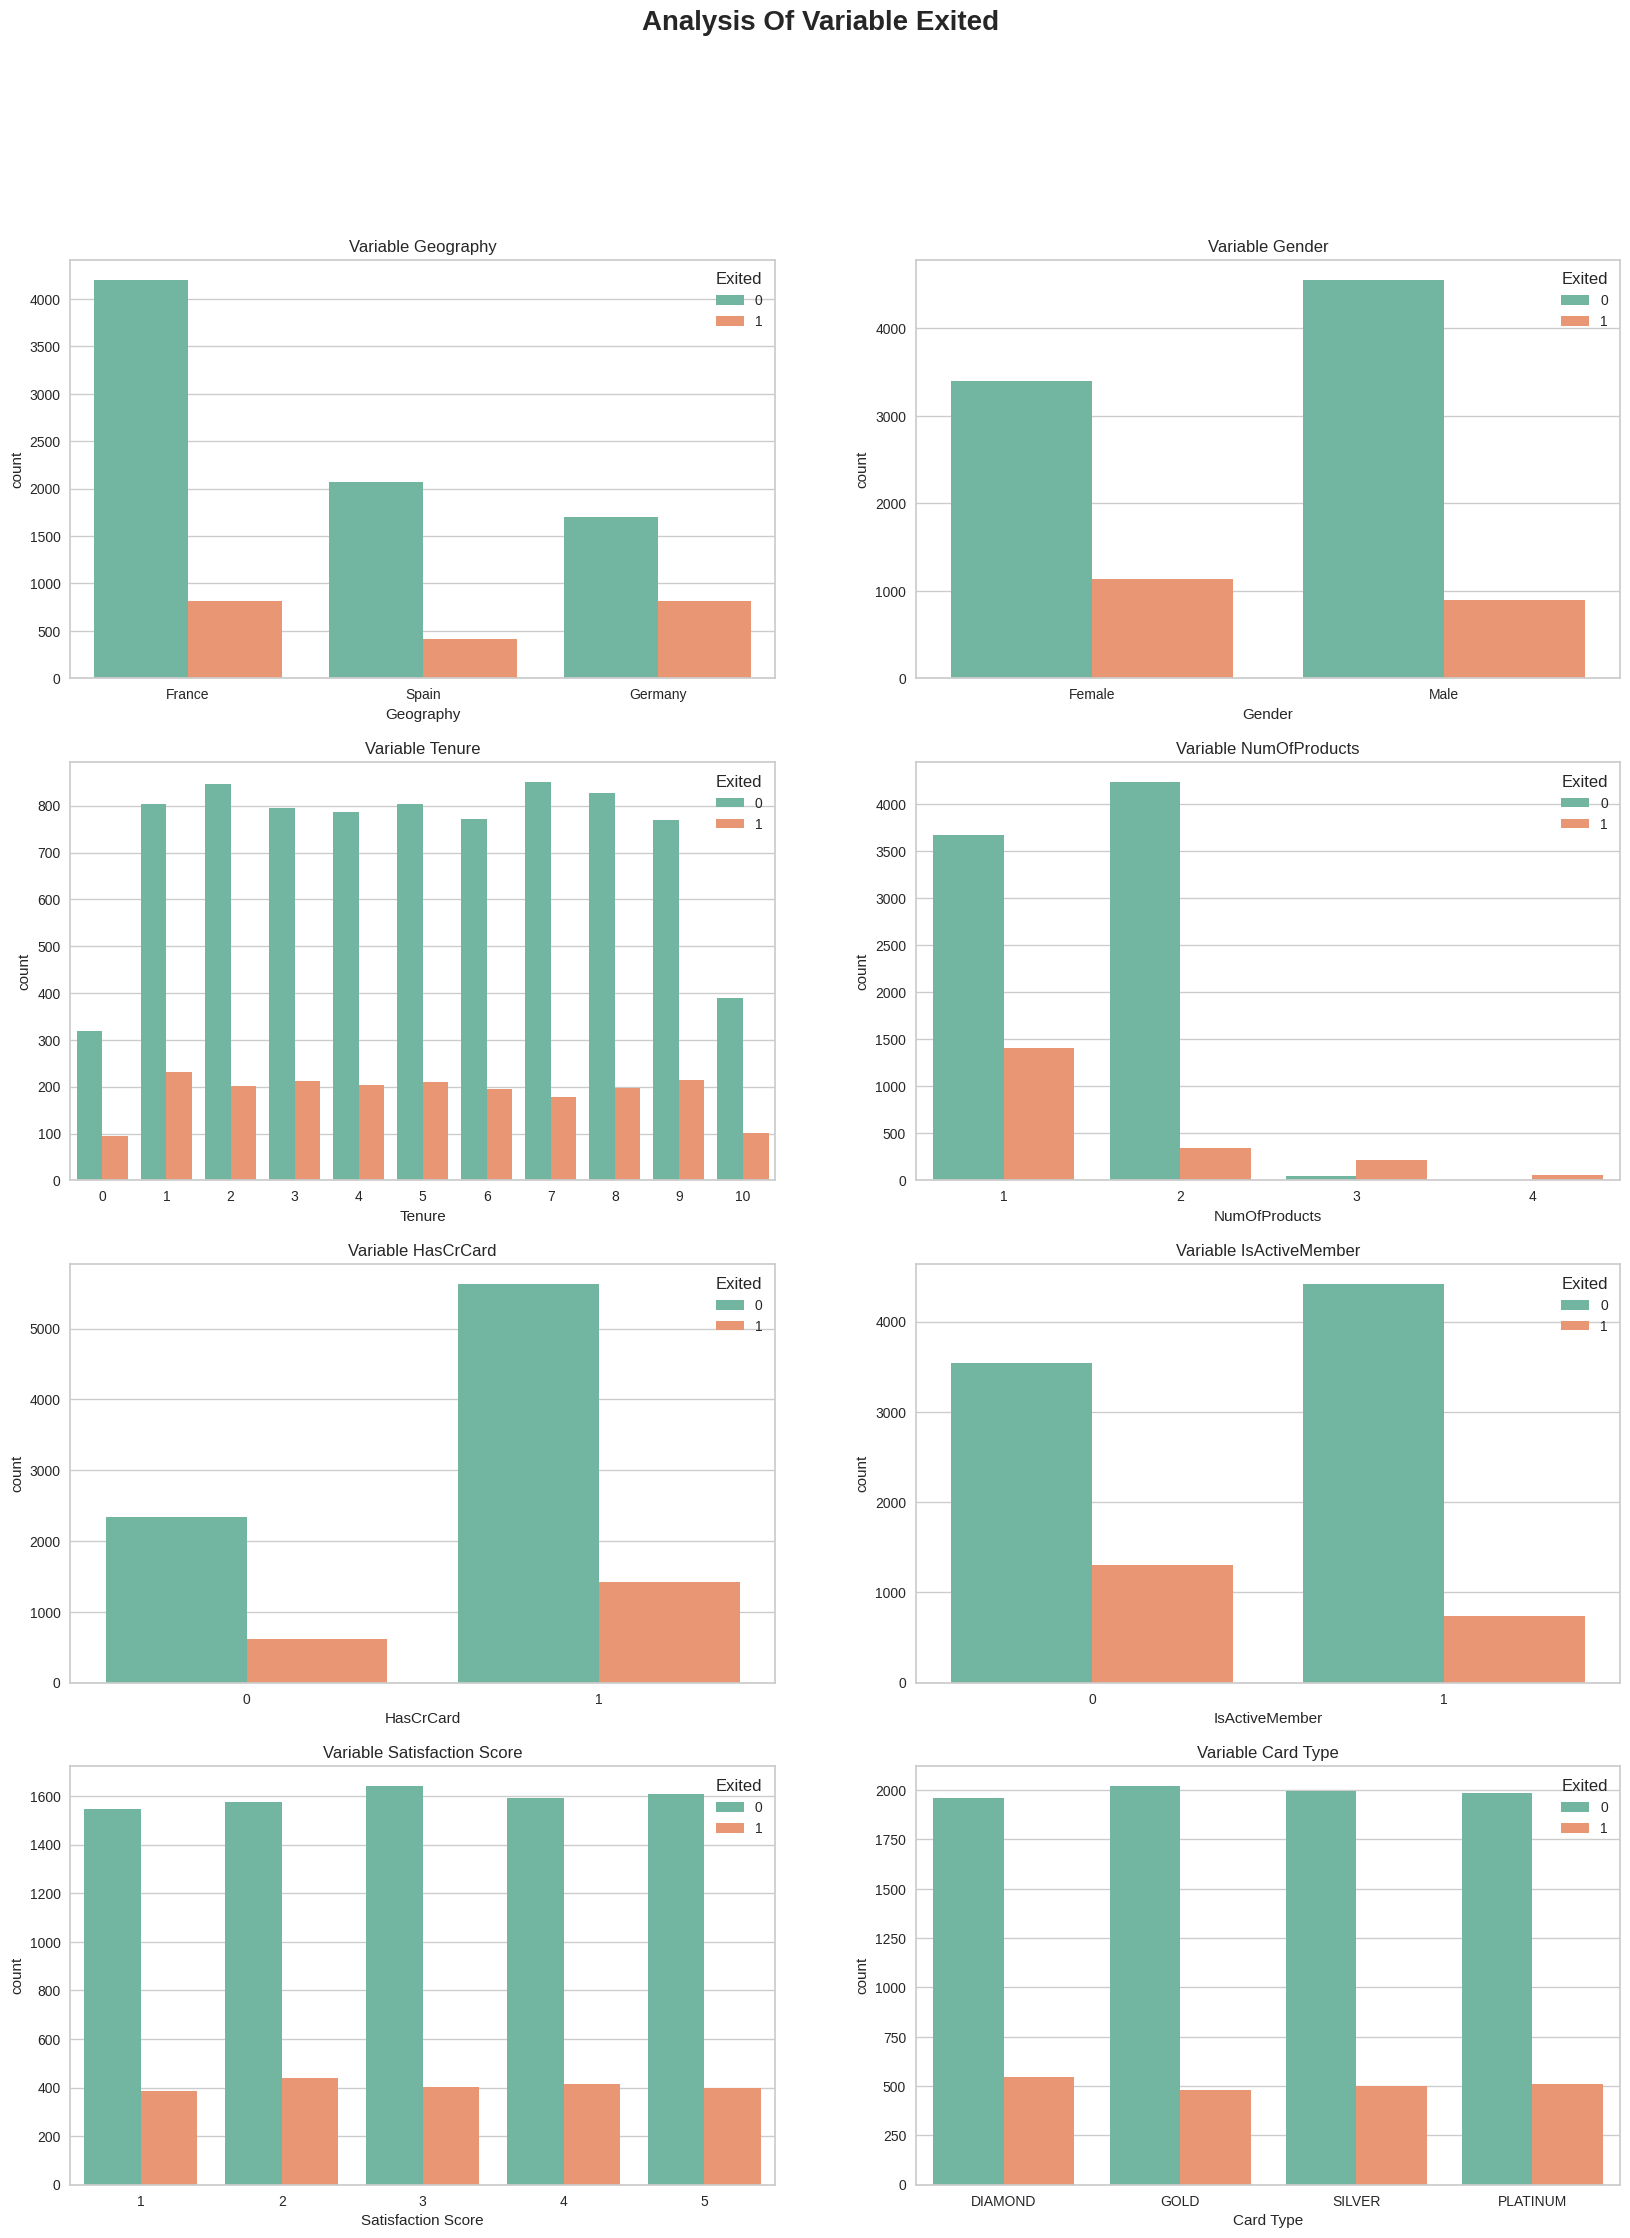

In [20]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

plt.subplot(4, 2, 1)
plt.gca().set_title('Variable Geography')
sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df)

#### Here, looking at the continuous variables, one variable that caught my attention was the Age variable, where we can see that older ages are more likely to have a positive result.

<Axes: xlabel='Exited', ylabel='Point Earned'>

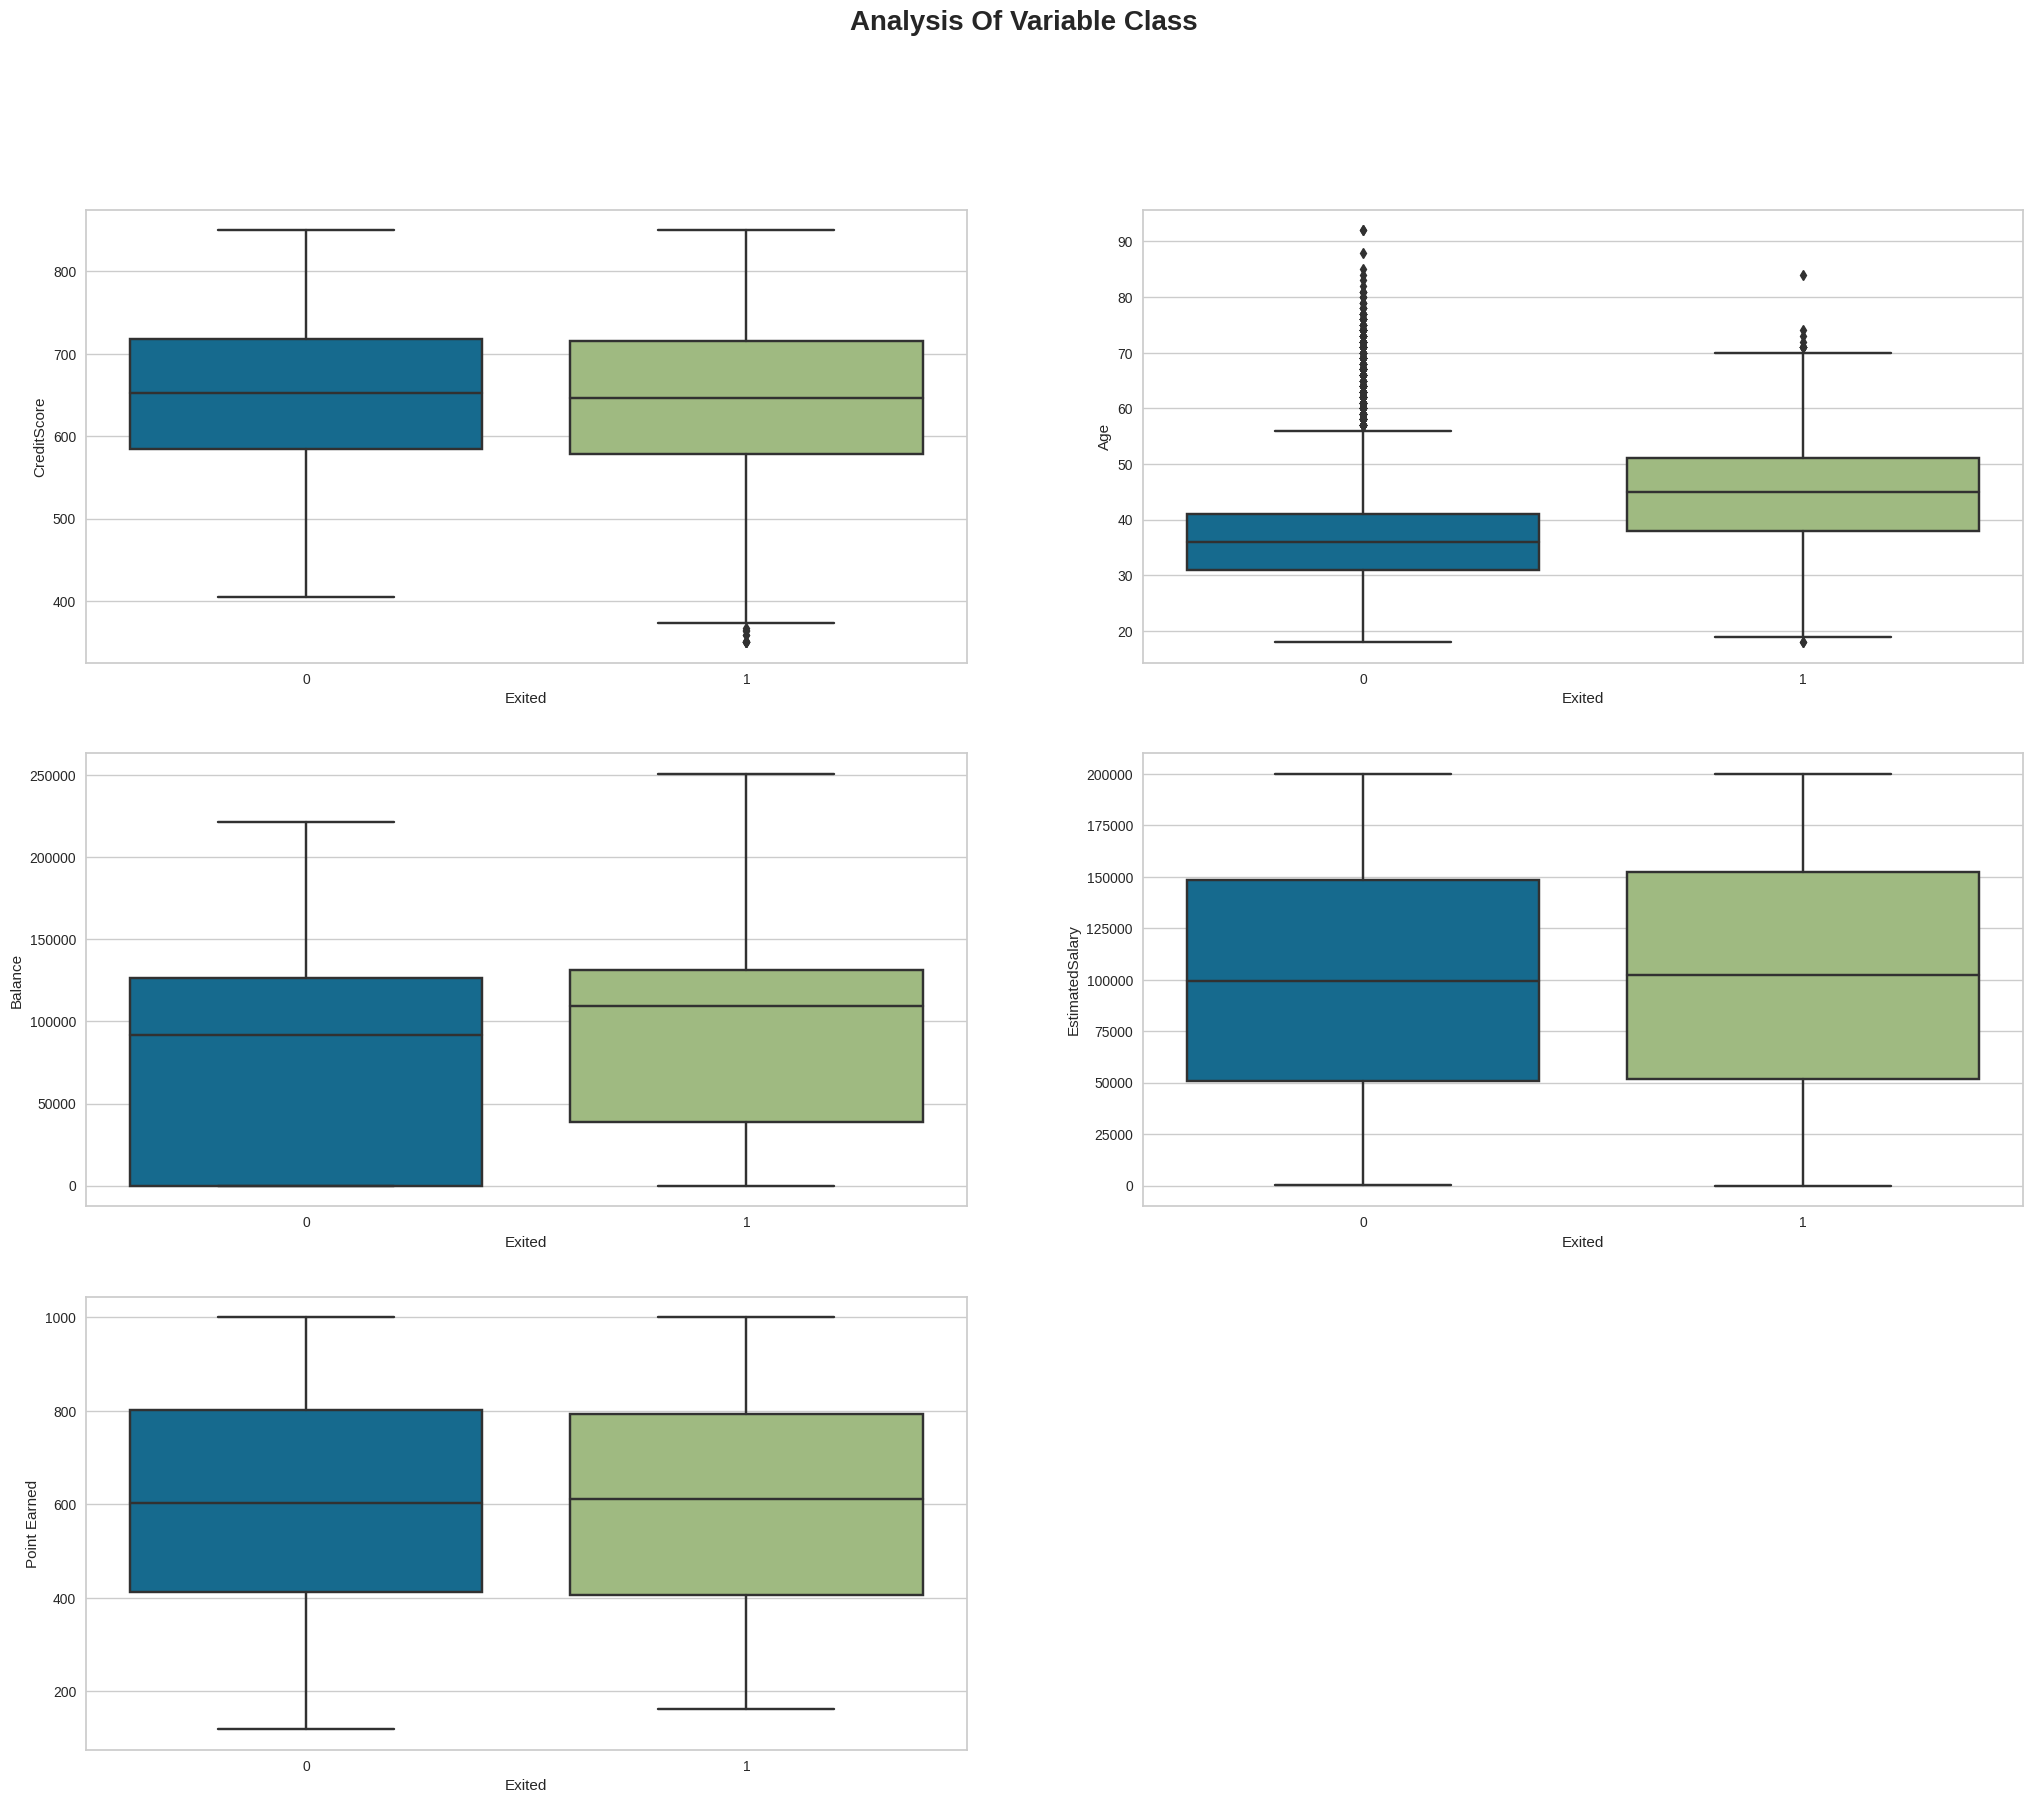

In [21]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=df)

## <font color='#1EB5D4'> 3. Model Building. </font>

#### Here we will eliminate the RowNumber, CustomerID and Surname variables that will not be used in the model.

In [57]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

#### OneHot Label Encoder
- Here we are going to use the OneHotLabel Encoder to transform our categorical variables into continuous variables.

In [58]:
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [59]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [25]:
f = bz2.BZ2File('../data/interim/preprocessed.pbz2', 'w')
pkl.dump(df, f)

In [62]:
attrib = df.columns

(Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
        'Point Earned', 'Geography_France', 'Geography_Germany',
        'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
        'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
       dtype='object'),
 20)

#### Separating into features variables and target variable.

In [26]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

In [27]:
f = bz2.BZ2File('../data/interim/X.pbz2', 'w')
pkl.dump(X, f)

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [29]:
f = bz2.BZ2File('../data/processed/X_scaled.pbz2', 'w')
pkl.dump(X_standard, f)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [31]:
f = bz2.BZ2File('../data/train and test/X_train.pbz2', 'w')
pkl.dump(X_train, f)

f2 = bz2.BZ2File('../data/train and test/X_test.pbz2', 'w')
pkl.dump(X_test, f2)

f3 = bz2.BZ2File('../data/train and test/y_train.pbz2', 'w')
pkl.dump(y_train, f3)

f4 = bz2.BZ2File('../data/train and test/y_test.pbz2', 'w')
pkl.dump(y_test, f4)

#### Balancing Classes
- As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

#### Naive Bayes
#### Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

#### Here in our first model, we didn't have such a good result, we got 70.46% accuracy, it was reasonably good, a nice thing is that it had a satisfactory result in predicting the result which is our goal.

0.7106666666666667

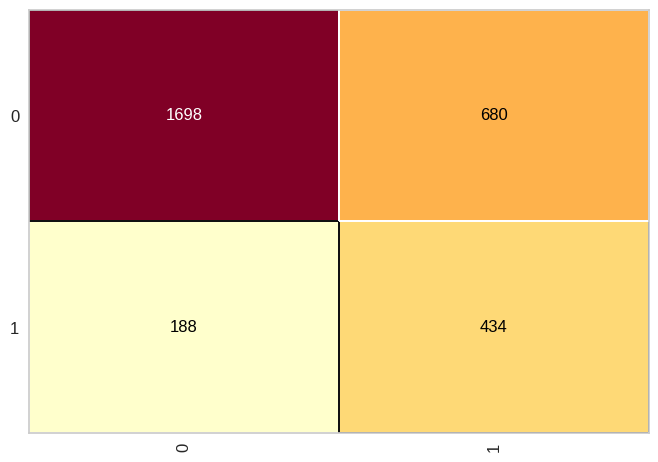

In [33]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      2378
           1       0.39      0.70      0.50       622

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.79      0.71      0.73      3000



In [37]:
score_naive_gaussian = 0.7046666666666667

In [38]:
f = bz2.BZ2File('../models/naive_bayes.pbz2', 'w')
pkl.dump(naive_bayes, f)

#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [39]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  6
Max Nvl:  11
Algorithm:  entropy
Score:  0.8355123754727392


#### Running Decision Tree.

#### Here in the decision tree model, we had the same result predicting our objective, which is churn, but we had an increment to predict non-churn results, which led us to 76.63% accuracy.

0.766

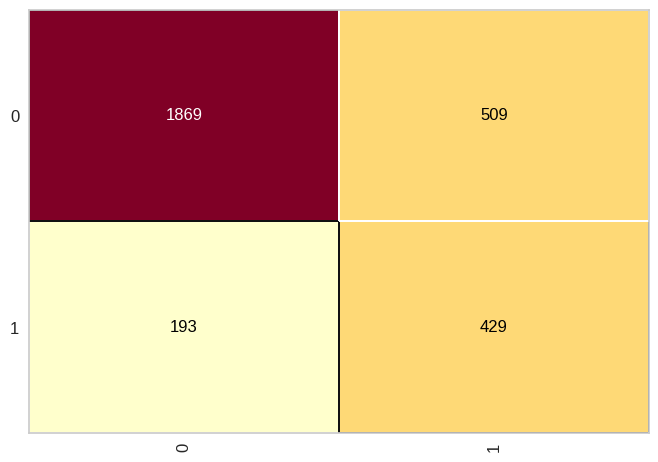

In [35]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [36]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2378
           1       0.46      0.69      0.55       622

    accuracy                           0.77      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.81      0.77      0.78      3000



In [37]:
score_tree = 0.7663333333333333

In [38]:
f = bz2.BZ2File('../models/decision_tree.pbz2', 'w')
pkl.dump(decision_tree, f)

#### Checking the most important variables of the model.

In [39]:
columns = df.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [40]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.8925511804899328
Mín Split:  6
Max Nvl:  11


#### Running Random Forest.

#### Here in the Random Forest tree model, we had practically the same result predicting our objective, which is churn, but we had a very good increase compared to the other models for predicting non-churn results, which led us to 83.63% of precision.

0.8366666666666667

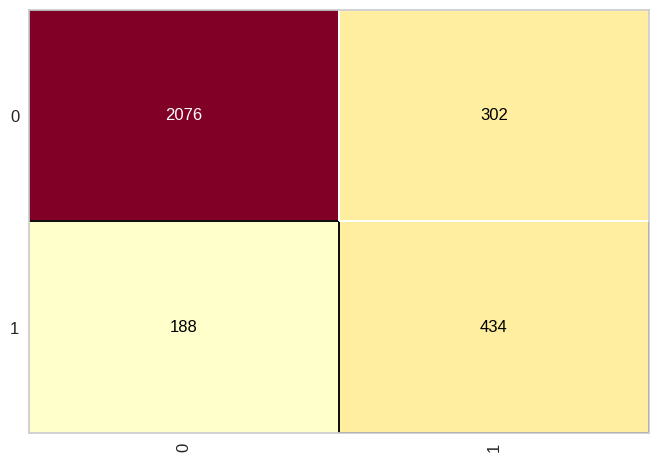

In [41]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 7, max_depth= 11,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [42]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      2378
           1       0.59      0.70      0.64       622

    accuracy                           0.84      3000
   macro avg       0.75      0.79      0.77      3000
weighted avg       0.85      0.84      0.84      3000



In [43]:
score_random = 0.8363333333333334

In [44]:
f = bz2.BZ2File('../models/random_forest.pbz2', 'w')
pkl.dump(random_forest, f)

#### Checking the most important variables of the model.

In [45]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                   0.267069
NumOfProducts         0.170386
Balance               0.103021
CreditScore           0.078642
Point Earned          0.076103
EstimatedSalary       0.073257
Tenure                0.044084
IsActiveMember        0.038729
Geography_Germany     0.031678
Satisfaction Score    0.027303
Geography_France      0.013233
Gender_Female         0.012659
Gender_Male           0.011453
HasCrCard             0.010350
Card Type_SILVER      0.008672
Card Type_DIAMOND     0.008619
Card Type_GOLD        0.008466
Geography_Spain       0.008216
Card Type_PLATINUM    0.008060
dtype: float64

#### Extra Trees
- Here we will use the Extra Trees Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [46]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(X_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)
print('Mín Split: ', gridExtraTrees.best_estimator_.min_samples_split)
print('Max Nvl: ', gridExtraTrees.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.7734601303244486
Mín Split:  5
Max Nvl:  7


#### Running Extra Trees.

#### Here at Extra Trees we had 82% accuracy, the model did well in predicting both outcomes.

0.8206666666666667

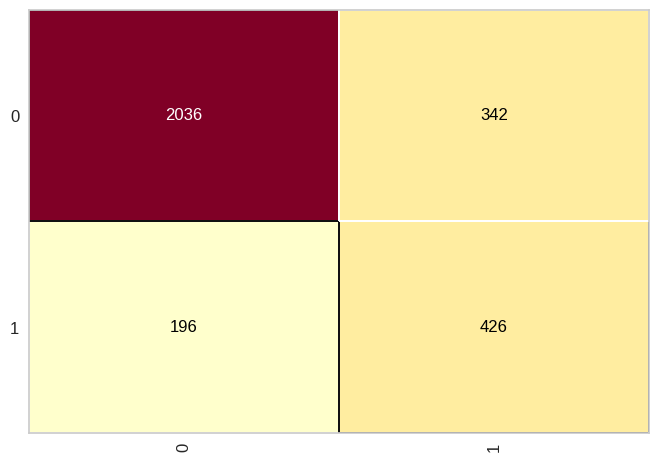

In [47]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, min_samples_split = 4, max_depth= 11, criterion = 'entropy', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [48]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2378
           1       0.55      0.68      0.61       622

    accuracy                           0.82      3000
   macro avg       0.73      0.77      0.75      3000
weighted avg       0.84      0.82      0.83      3000



In [49]:
score_extra = 0.8206666666666667

In [50]:
f = bz2.BZ2File('../models/extra_trees.pbz2', 'w')
pkl.dump(extra_trees, f)

#### K-Means
- Here we will use the K Means Model.

#### In K-Means we obtained 54% of accuracy.

In [54]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2, random_state= 0)
kmeans_model.fit(X_train)
previsoes = kmeans_model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.423


In [52]:
score_kmeans = 0.545

In [55]:
f = bz2.BZ2File('../models/kmeans_model.pbz2', 'w')
pkl.dump(kmeans_model, f)

#### K-Neighbors
- Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Here we will use the GridSearch to figure out the best metrics to use in this model.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8794770773638969)

#### Running K-Neighbors.

#### We didn't get a good result with the K-Neighbors model.

0.7743333333333333

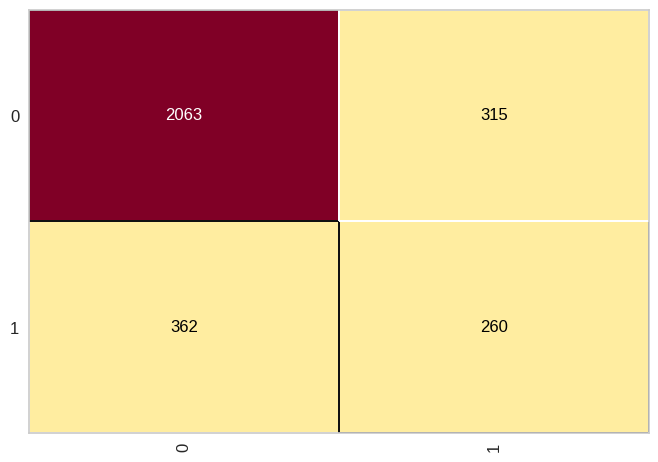

In [57]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [58]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2378
           1       0.45      0.42      0.43       622

    accuracy                           0.77      3000
   macro avg       0.65      0.64      0.65      3000
weighted avg       0.77      0.77      0.77      3000



In [59]:
score_knn = 0.671

In [60]:
f = bz2.BZ2File('../models/knn.pbz2', 'w')
pkl.dump(knn, f)

#### Logistic Regression
- Here we will use the Linear Regression Model.

#### We didn't get a good result with the Linear Regression model, it was even good in predicting our objective result but it was bad in predicting the negative result.

0.7063333333333334

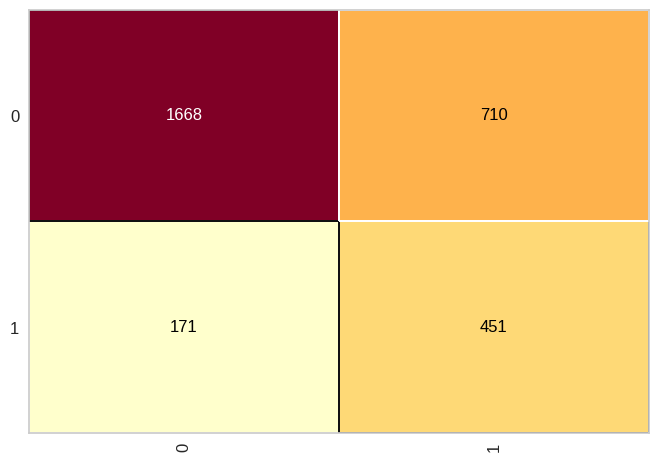

In [61]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [62]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2378
           1       0.39      0.73      0.51       622

    accuracy                           0.71      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.71      0.73      3000



In [63]:
logistic_normal = 0.6576666666666666

In [64]:
f = bz2.BZ2File('../models/logistic.pbz2', 'w')
pkl.dump(logistic, f)

#### AdaBoost
- Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Applying GridSearch

In [65]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.5
Score:  0.7782951289398281


#### Running Ada Boost.

#### This is probably our best model, we had a lower accuracy but we had a great result predicting the result that is our goal.

0.78

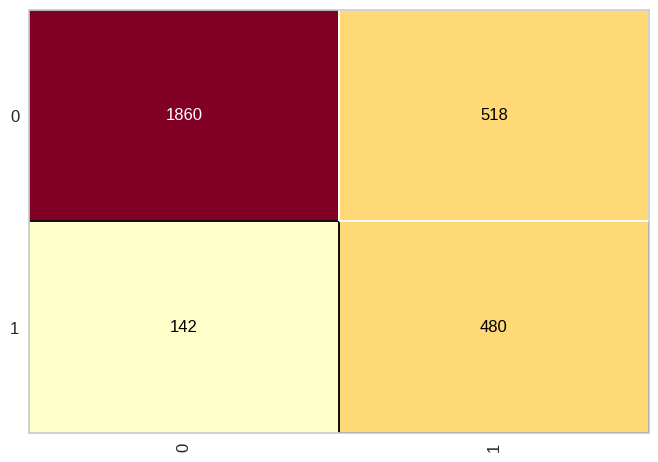

In [66]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.5, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [67]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2378
           1       0.48      0.77      0.59       622

    accuracy                           0.78      3000
   macro avg       0.71      0.78      0.72      3000
weighted avg       0.84      0.78      0.80      3000



In [68]:
score_ada_scaler = 0.78

In [69]:
f = bz2.BZ2File('../models/ada_boost.pbz2', 'w')
pkl.dump(ada_boost, f)

#### Gradient Boosting
- Here we will use the Gradient Boosting Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.9315008333129532


#### Running Gradient Boosting

#### Here we had 81.33% accuracy, it is a good model to predict both results.

0.8133333333333334

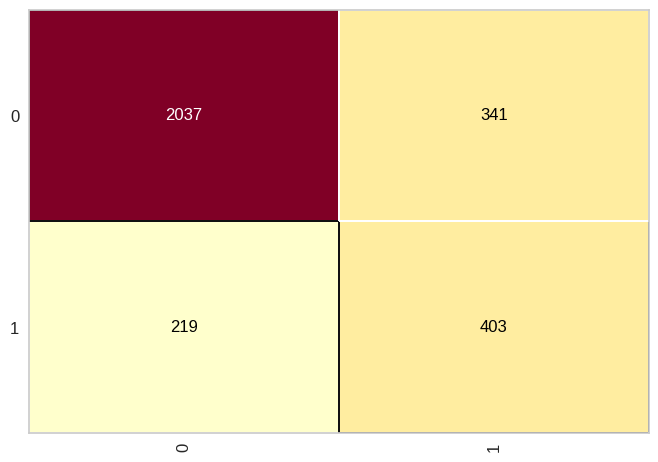

In [71]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [72]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2378
           1       0.54      0.65      0.59       622

    accuracy                           0.81      3000
   macro avg       0.72      0.75      0.73      3000
weighted avg       0.83      0.81      0.82      3000



In [73]:
score_grad_standard = 0.8133333333333334

In [74]:
f = bz2.BZ2File('../models/grad_boost.pbz2', 'w')
pkl.dump(grad_boost, f)

#### LGBM
- Here we will use the LGBM Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [75]:
from lightgbm import LGBMClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'min_child_samples': [1, 3, 5, 7, 9, 15],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(X_train, y_train.ravel())

print('Score: ', lgbm_grid.best_score_)
print('Params: ', lgbm_grid.best_params_)

Score:  0.8997138583423673
Params:  {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'num_leaves': 9, 'n_estimators': 500, 'min_child_weight': 1, 'min_child_samples': 3, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.9}


#### Running LGBM

#### Here at LGBM we had 81.66% Accuracy but we didn't get a good result in predicting our objective, it only learned the negative result.

0.8166666666666667

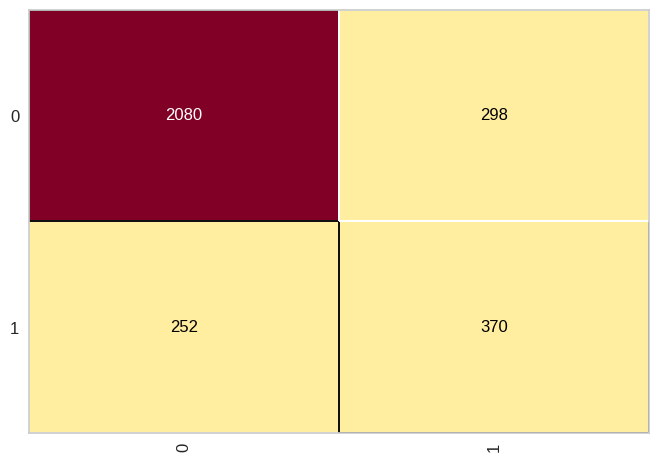

In [76]:
lgbm = LGBMClassifier(subsample = 0.5, reg_lambda = 0.3, reg_alpha = 0.1, num_leaves = 9, n_estimators = 500, min_child_weight = 7, min_child_samples = 9, max_depth = 4, learning_rate = 0.8, colsample_bytree = 0.9, random_state = 0)
lgbm.fit(X_train, y_train)
previsoes = lgbm.predict(X_test)

cm = ConfusionMatrix(lgbm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [77]:
classification_lgbm_standard = (classification_report(y_test, previsoes))
print(classification_lgbm_standard)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2378
           1       0.55      0.59      0.57       622

    accuracy                           0.82      3000
   macro avg       0.72      0.73      0.73      3000
weighted avg       0.82      0.82      0.82      3000



In [78]:
score_lgbm_standard = 0.8166666666666667

In [79]:
f = bz2.BZ2File('../models/lgbm.pbz2', 'w')
pkl.dump(lgbm, f)

#### XGB Boost
- Here we will use the XGB Boost Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [80]:
from xgboost.sklearn import XGBClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.9153832378223495
Params:  {'subsample': 0.9, 'reg_lambda': 0.9, 'reg_alpha': 0.9, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.03, 'gamma': 0.1, 'colsample_bytree': 0.9}


#### Running XGB.

#### The accuracy here at XGB was very good, but we had more or less the same problem, the model learned a lot the negative result but not the positive one.

0.8253333333333334

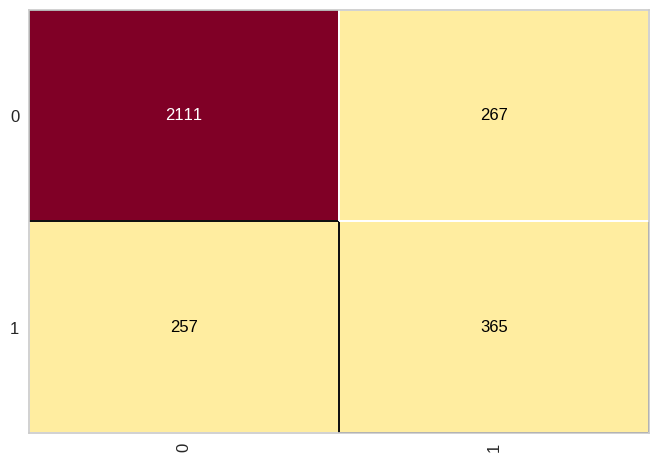

In [81]:
xgb = XGBClassifier(subsample = 0.7, reg_lambda = 0.3, reg_alpha = 0.3, n_estimators = 500, min_child_weight = 3, max_depth = 6, learning_rate = 0.3, gamma = 0.9, colsample_bytree = 0.3, random_state = 0)
xgb.fit(X_train, y_train)
previsoes = xgb.predict(X_test)

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [82]:
classification_xgb_standard = (classification_report(y_test, previsoes))
print(classification_xgb_standard)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2378
           1       0.58      0.59      0.58       622

    accuracy                           0.83      3000
   macro avg       0.73      0.74      0.74      3000
weighted avg       0.83      0.83      0.83      3000



In [83]:
score_xgb = 0.8253333333333334

In [86]:
f = bz2.BZ2File('../models/xgb.pbz2', 'w')
pkl.dump(xgb, f)

#### Checking key variables to predict the outcome.
- Chi 2

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score'])

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
Balance,7156628.86
EstimatedSalary,51542.37
Age,2299.99
Geography_Germany,225.01
IsActiveMember,118.54
CreditScore,102.91
Gender_Female,61.62
Geography_France,54.64
Gender_Male,51.30
Geography_Spain,20.97


#### Decision Tree.

In [88]:
feature_imp

Age                   0.281124
NumOfProducts         0.176855
Balance               0.131615
EstimatedSalary       0.088956
Point Earned          0.075437
CreditScore           0.066963
Tenure                0.043370
IsActiveMember        0.041642
Geography_Germany     0.029502
Satisfaction Score    0.016569
Gender_Male           0.014114
Geography_Spain       0.007206
Card Type_GOLD        0.006539
Gender_Female         0.006416
Card Type_SILVER      0.006183
Card Type_PLATINUM    0.002321
Geography_France      0.002231
Card Type_DIAMOND     0.001523
HasCrCard             0.001435
dtype: float64

#### Random Forest.

In [89]:
feature_imp_random

Age                   0.267069
NumOfProducts         0.170386
Balance               0.103021
CreditScore           0.078642
Point Earned          0.076103
EstimatedSalary       0.073257
Tenure                0.044084
IsActiveMember        0.038729
Geography_Germany     0.031678
Satisfaction Score    0.027303
Geography_France      0.013233
Gender_Female         0.012659
Gender_Male           0.011453
HasCrCard             0.010350
Card Type_SILVER      0.008672
Card Type_DIAMOND     0.008619
Card Type_GOLD        0.008466
Geography_Spain       0.008216
Card Type_PLATINUM    0.008060
dtype: float64

#### Checking the results.

In [90]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

xgb_dict_v1 = {'Model':'XGB',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_xgb}

lgbm_dict_v1 = {'Model':'LGBM',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_lgbm_standard}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'XGB':pd.Series(xgb_dict_v1),
                       'LGBM':pd.Series(lgbm_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,K-Means,KNN,Logistic Regression,AdaBoost,GradientBoosting,XGB,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Means,KNN,Logistic Regression,AdaBoost,GradientBoost,XGB,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-,-,-
Precision,0.704667,0.766333,0.836333,0.820667,0.545,0.671,0.657667,0.78,0.813333,0.825333,0.816667


In [91]:
f = bz2.BZ2File('../src/summay models/models_summary.pbz2', 'w')
pkl.dump(resume, f)

## <font color='#1EB5D4'> 4. Conclusion. </font>

#### Looking at our database we can see that although we have a lot of columns with a lot of information, the number of customers is not very large, we have 10000 data and 18 columns, we can verify that we have categorical variables and continuous variables, something that facilitates the our work is that we do not have null values, which does not require treatment.

#### Speaking about the analysis of our data, we can see that we have an absolute correlation between the Complain variables and our Target variable, with that we exclude the Complain variable so that we can run our models, looking at the exploratory analysis we can verify that a good part of the our data are well distributed, we can see some peculiarities such as the majority of customers are from France, usually between 1 and 2 products, a good part of our customers do not have money in their account, and we can see that the age of our customers meets a distribution normal, a very important thing we saw is that our Target variable is unbalanced.

#### We have some small Outliers but it is nothing that influences or harms our data, when we look at our Bivariate analysis a variable that caught my attention was the Age variable, when we look at it we can see that older people are more prone to have churn.

#### Entering the Machine Learning part, we removed some variables that do not make sense for our models, we transformed our Categorical variables into Continuous variables using the OneHot Label Encoder (I had a better result using OneHot than the Label Encoder), we separated our data into training with 70% of our data and testing with 30%, as mentioned earlier our Target variable is unbalanced, so after running the models I was able to confirm this, without balancing the data our results were good but the model learned only the model with negative churn and not the result we seek.

#### After balancing our Target class and running the Machine Learning models we got some good results and some not so much, most of the models had a satisfactory result learning both the negative result and the positive result, and others learned only the negative result and not the our objective result, in terms of accuracy, the best model was the Random Forest with 83.63%, but the model that best managed to predict our Target variable was the Ada Boost model, where we had 78% accuracy but a greater accuracy when we speak in predicting Churn.

#### When we look at the most important variables, we have Age, NumOfProducts and Balance, with Age being the main one, which confirms what we saw in our exploratory analysis.

### <font color='#E6CA5E'> if you liked the analysis, leave a "like" (up arrow),

---

and comment what you thought about the study, if you have any suggestions I would be happy to hear from you... . </font>